In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path1="E:/andrew machine learning/andrew_ml_ex22391/ex2data1.txt"
data1=pd.read_csv(path1,header=None,names=["Exam 1","Exam 2","Admitted"])
data1.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


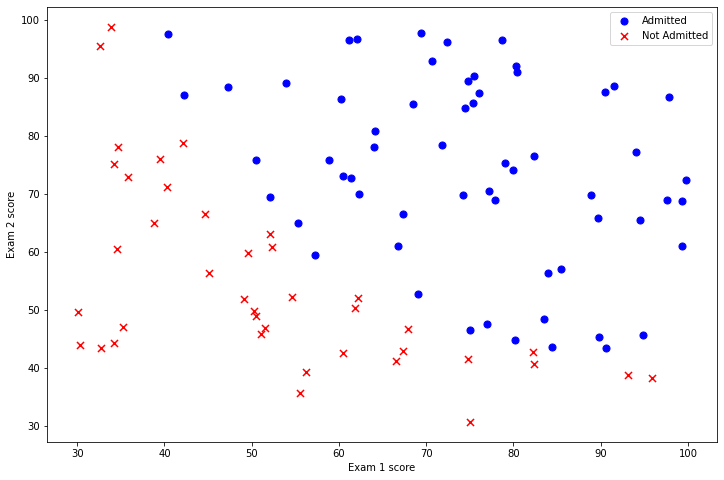

In [3]:
positive=data1[data1["Admitted"]==1]
negative=data1[data1["Admitted"]==0]

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive["Exam 1"], positive["Exam 2"],s=50,c="b",marker="o",label="Admitted")
ax.scatter(negative["Exam 1"], negative["Exam 2"],s=50,c="r",marker="x",label="Not Admitted")
ax.legend()
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
plt.show()

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [16]:
def cost(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    left=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    right=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(left-right)/(len(X))

In [6]:
data1.insert(0,"Ones",1)

In [7]:
cols=data1.shape[1]
X=data1.iloc[:,0:cols-1]
y=data1.iloc[:,cols-1:cols]
theta=np.zeros(3)

In [8]:
X=np.array(X.values)
y=np.array(y.values)

In [9]:
print(X.shape,theta.shape,y.shape)

(100, 3) (3,) (100, 1)


In [17]:
cost(theta,X,y)

0.6931471805599453

In [18]:
def gredient(theta,X,y):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    
    error=sigmoid(X*theta.T)-y
    
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    
    return grad

In [19]:
import scipy.optimize as opt
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gredient,args=(X,y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [20]:
cost(result[0], X, y)

0.20349770158947425

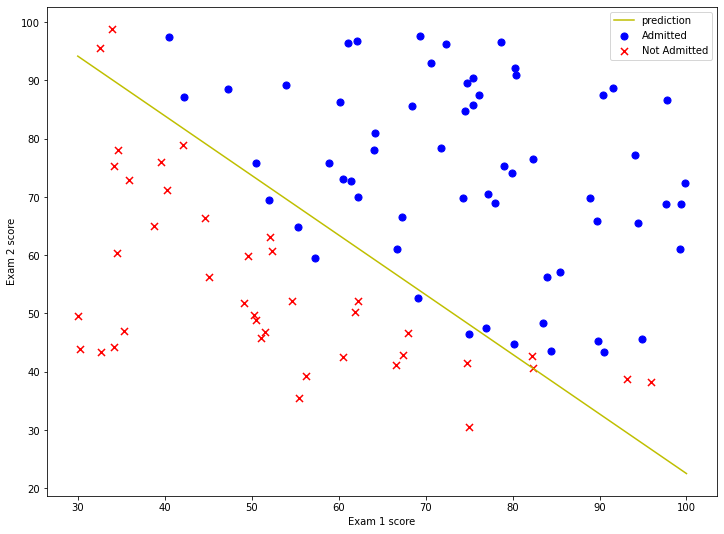

In [21]:
x=np.linspace(30,100,50)
f=(-result[0][0]-result[0][1]*x)/result[0][2]

fig,ax=plt.subplots(figsize=(12,9))
ax.plot(x,f,"y",label="prediction")
ax.scatter(positive["Exam 1"], positive["Exam 2"],s=50,c="b",marker="o",label="Admitted")
ax.scatter(negative["Exam 1"], negative["Exam 2"],s=50,c="r",marker="x",label="Not Admitted")
ax.legend()
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
plt.show()

In [35]:
def hfunc1(theta,X):
    return sigmoid(np.dot(theta,X))
hfunc1(result[0],[1,45,85])

0.776290625526598

In [73]:
def predict(theta,X):
    prob=sigmoid(np.dot(X,theta))
    return [1 if x >=0.5 else 0 for x in prob]

In [80]:
#统计正确率
predictions=predict(result[0],X)
true=y.ravel().tolist()
c=0
for i in range(len(predictions)):
    if predictions[i]==true[i]:
        c=c+1
print("the accuracy is {0}%".format((c/len(true))*100))

the accuracy is 89.0%


In [71]:
#a=np.array([[1,45,85],[1,35,95]])
#sigmoid(np.dot(a,result[0]))

Example 2

In [82]:
path2="E:/andrew machine learning/andrew_ml_ex22391/ex2data2.txt"
data2=pd.read_csv(path2,header=None,names=["Test 1","Test 2","Accepted"])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


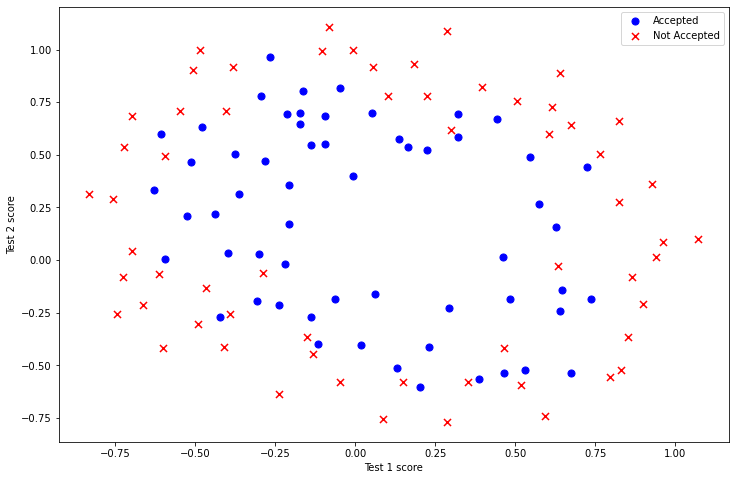

In [84]:
positive2=data2[data2["Accepted"]==1]
negative2=data2[data2["Accepted"]==0]

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive2["Test 1"], positive2["Test 2"],s=50,c="b",marker="o",label="Accepted")
ax.scatter(negative2["Test 1"], negative2["Test 2"],s=50,c="r",marker="x",label="Not Accepted")
ax.legend()
ax.set_xlabel("Test 1 score")
ax.set_ylabel("Test 2 score")
plt.show()

In [85]:
degree=6
data2_=data2
x1=data2_["Test 1"]
x2=data2_["Test 2"]
data2_.insert(3,"Ones",1)

In [87]:
for i in range(1,degree+1):
    for j in range(0,i+1):
        data2_["F"+str(i-j)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
    
data2_.drop("Test 1",axis=1,inplace=True)
data2_.drop("Test 2",axis=1,inplace=True)
data2_.head()

,Accepted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [115]:
def costReg(theta,X,y,learning_rate):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg=(learning_rate/(2*len(X)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first-second)/len(X)+reg

In [124]:
def gredientReg(theta,X,y,learning_rate):
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    
    parameters=int(theta.ravel().shape[1])
    grad=np.zeros(parameters)
    
    error=sigmoid(X*theta.T)-y
    
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        if (i==0):
            grad[i]=np.sum(term)/len(X)
        else:
            grad[i]=np.sum(term)/len(X)+((learning_rate/len(X))*theta[:,j])
    return grad

In [125]:
cols=data2_.shape[1]
X2=data2_.iloc[:,1:cols]
y2=data2_.iloc[:,0:1]
theta2=np.zeros(cols-1)

X2=np.array(X2.values)
y2=np.array(y2.values)

learning_rate=1

In [126]:
costReg(theta2,X2,y2,learning_rate)

0.6931471805599454

In [127]:
result2=opt.fmin_tnc(func=costReg,x0=theta2,fprime=gradientReg,args=(X2,y2,learning_rate))
result2

(array([ 1.27271027,  0.62529965,  1.18111687, -2.01987399, -0.91743189,
        -1.43166928,  0.12393228, -0.36553118, -0.35725403, -0.17516292,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603299, -0.04466178, -0.27778951, -0.29539513,
        -0.45645982, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]),
 32,
 1)

In [140]:
predictions2=predict(result2[0],X2)
true2=y2.ravel().tolist()
c2=0
for i in range(len(predictions2)):
    if predictions2[i]==true2[i]:
        c2=c2+1
print("the accuracy is {0}%".format((c2/len(true2))*100))

the accuracy is 83.05084745762711%


In [131]:
def hfunc2(theta,x1,x2):
    temp=theta[0][0]
    place=0
    for i in range(1,degree+1):
        for j in range(0,i+1):
            temp+=np.power(x1,i-j)*np.power(x2,j)*theta[0][place+1]
            place+=1
    return temp

In [132]:
def find_decision_boundary(theta):
    t1=np.linspace(-1,1.5,1000)
    t2=np.linspace(-1,1.5,1000)
    
    cordinates=[(x,y) for x in t1 for y in t2]
    x_cord,y_cord=zip(*cordinates)
    h_val=pd.DataFrame({"x1":x_cord,"x2":y_cord})
    h_val["hval"]=hfunc2(theta,h_val["x1"],h_val["x2"])
    
    decision=h_val[np.abs(h_val["hval"])<2*10**-3]
    return decision.x1,decision.x2

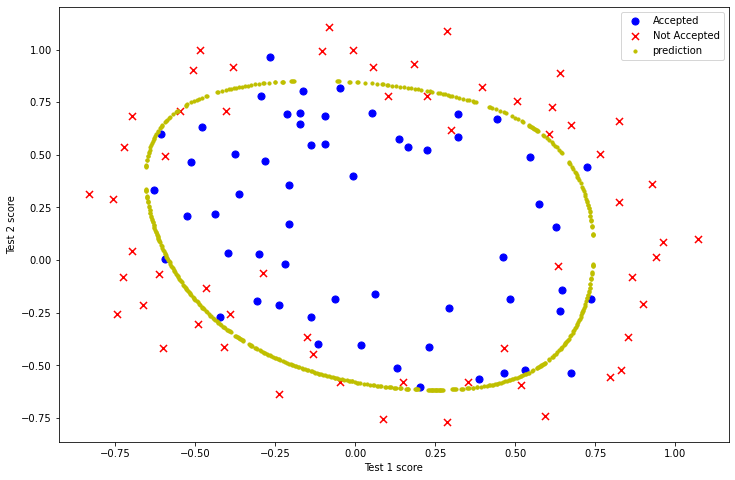

In [133]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive2["Test 1"], positive2["Test 2"],s=50,c="b",marker="o",label="Accepted")
ax.scatter(negative2["Test 1"], negative2["Test 2"],s=50,c="r",marker="x",label="Not Accepted")

ax.set_xlabel("Test 1 score")
ax.set_ylabel("Test 2 score")
x,y=find_decision_boundary(result2)
plt.scatter(x,y,c="y",s=10,label="prediction")
ax.legend()
plt.show()

In [142]:
learningRate2 = 0
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate2))

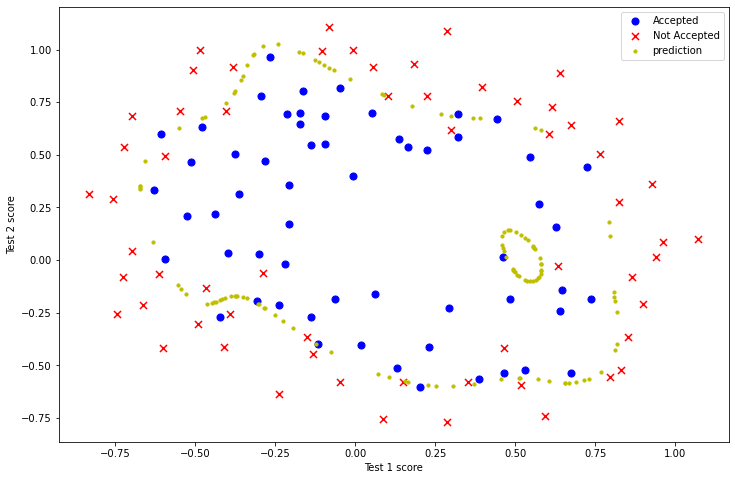

In [143]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive2["Test 1"], positive2["Test 2"],s=50,c="b",marker="o",label="Accepted")
ax.scatter(negative2["Test 1"], negative2["Test 2"],s=50,c="r",marker="x",label="Not Accepted")

ax.set_xlabel("Test 1 score")
ax.set_ylabel("Test 2 score")
x,y=find_decision_boundary(result3)
plt.scatter(x,y,c="y",s=10,label="prediction")
ax.legend()
plt.show()

In [149]:
learningRate3 = 10
result4 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate3))

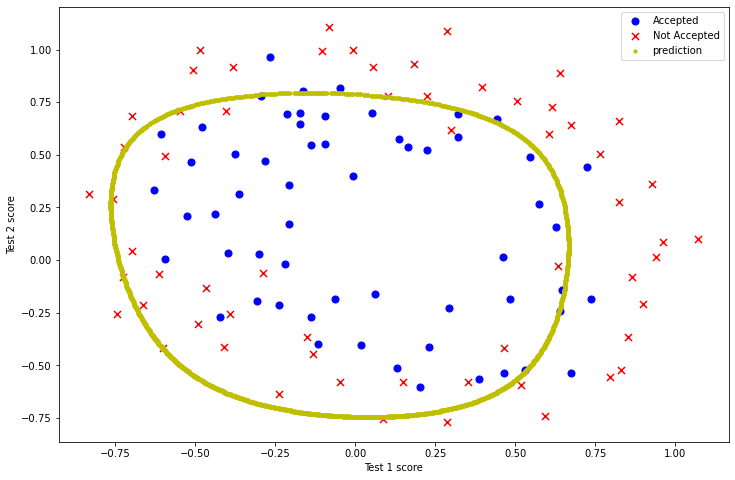

In [150]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive2["Test 1"], positive2["Test 2"],s=50,c="b",marker="o",label="Accepted")
ax.scatter(negative2["Test 1"], negative2["Test 2"],s=50,c="r",marker="x",label="Not Accepted")

ax.set_xlabel("Test 1 score")
ax.set_ylabel("Test 2 score")
x,y=find_decision_boundary(result4)
plt.scatter(x,y,c="y",s=10,label="prediction")
ax.legend()
plt.show()

In [151]:
118*0.98

115.64